In [1]:
!nvidia-smi

Tue Oct 31 11:56:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

!yolo mode=checks

WARNING ⚠️ 'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [1]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="XROkBOp3fXs8NJvfuSo3")
project = rf.workspace("innodatatics1").project("pipe-inventory")
dataset = project.version(4).download("yolov8")

mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to pipe-inventory-4 in yolov8:: 100%|██████████| 1206/1206 [00:00<00:00, 3016.57it/s]


In [2]:
%cd /content/datasets

/content/datasets


In [5]:


!yolo task=detect mode=train model=yolov8m.pt data=/content/pipe-inventory-4/data.yaml epochs=10 imgsz=250 plots=True


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/pipe-inventory-4/data.yaml, epochs=10, patience=50, batch=16, imgsz=250, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=

In [7]:
!ls /content/datasets/runs/detect/train3

args.yaml					    R_curve.png       val_batch0_labels.jpg
confusion_matrix.png				    results.csv       val_batch0_pred.jpg
events.out.tfevents.1698753594.8bd12b6e7957.1833.0  results.png       val_batch1_labels.jpg
F1_curve.png					    train_batch0.jpg  val_batch1_pred.jpg
P_curve.png					    train_batch1.jpg  weights
PR_curve.png					    train_batch2.jpg


In [8]:
from IPython.display import Image

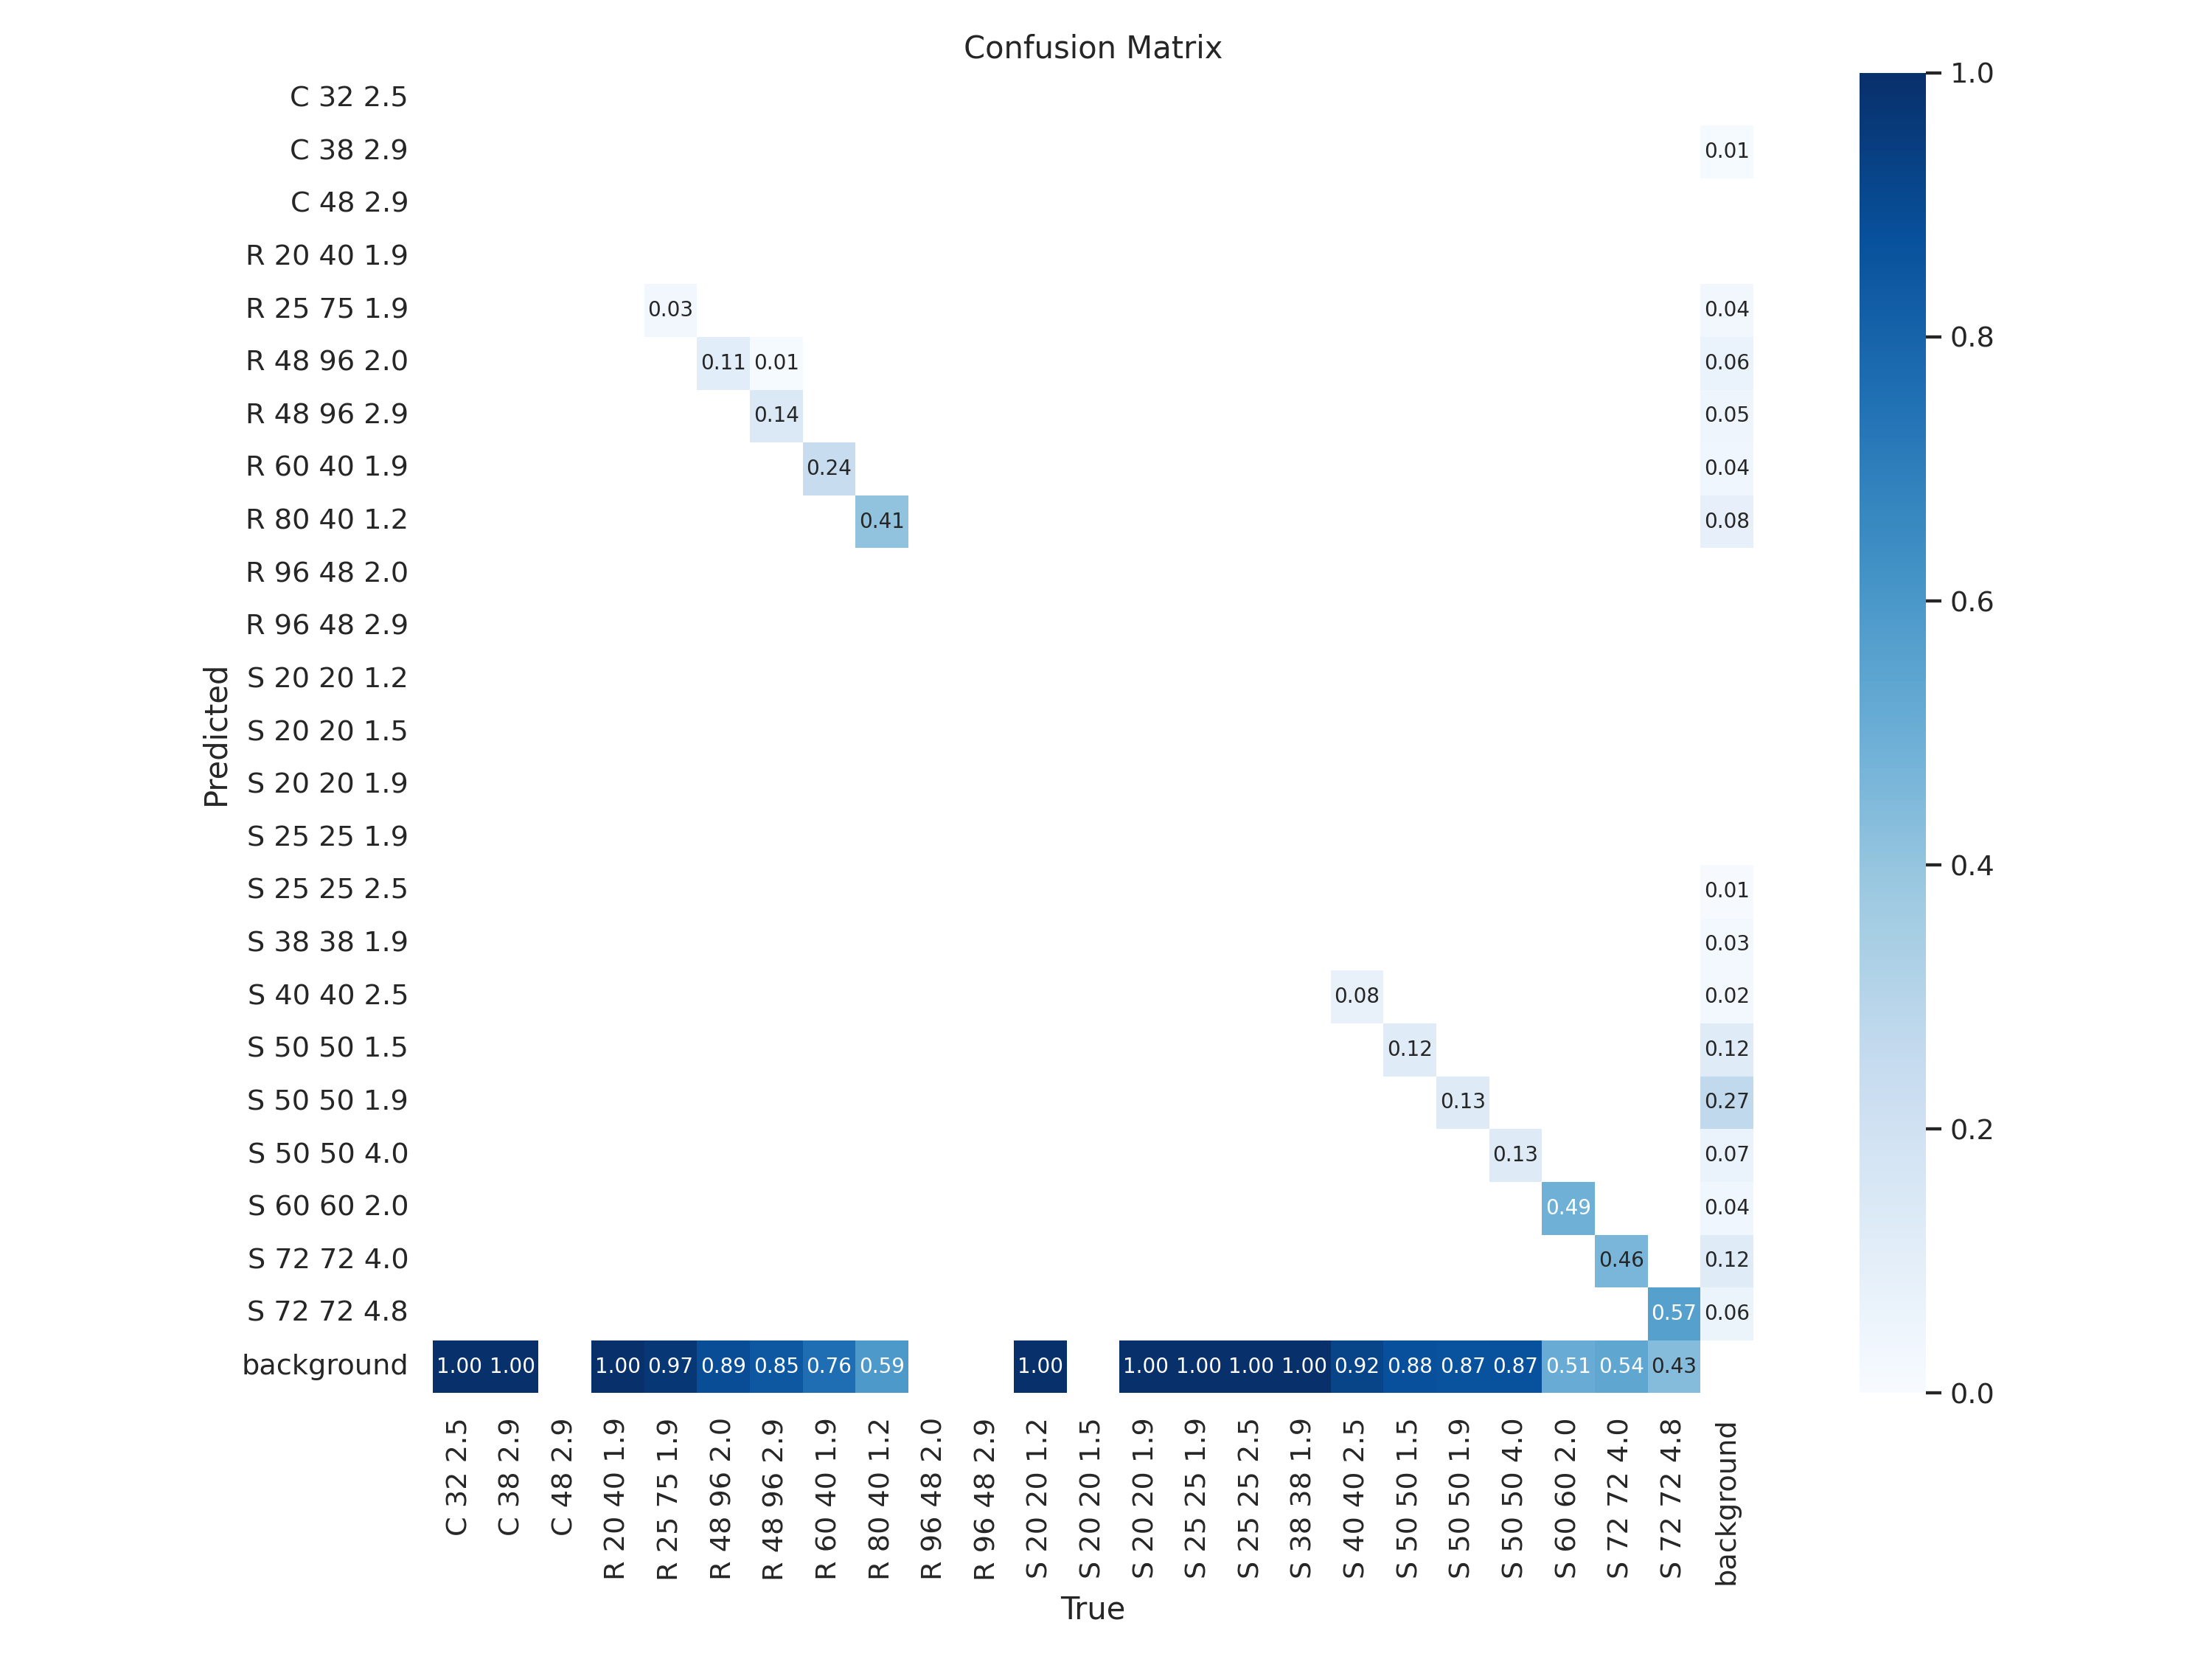

In [10]:
Image(filename='/content/datasets/runs/detect/train3/confusion_matrix.png', width=600)

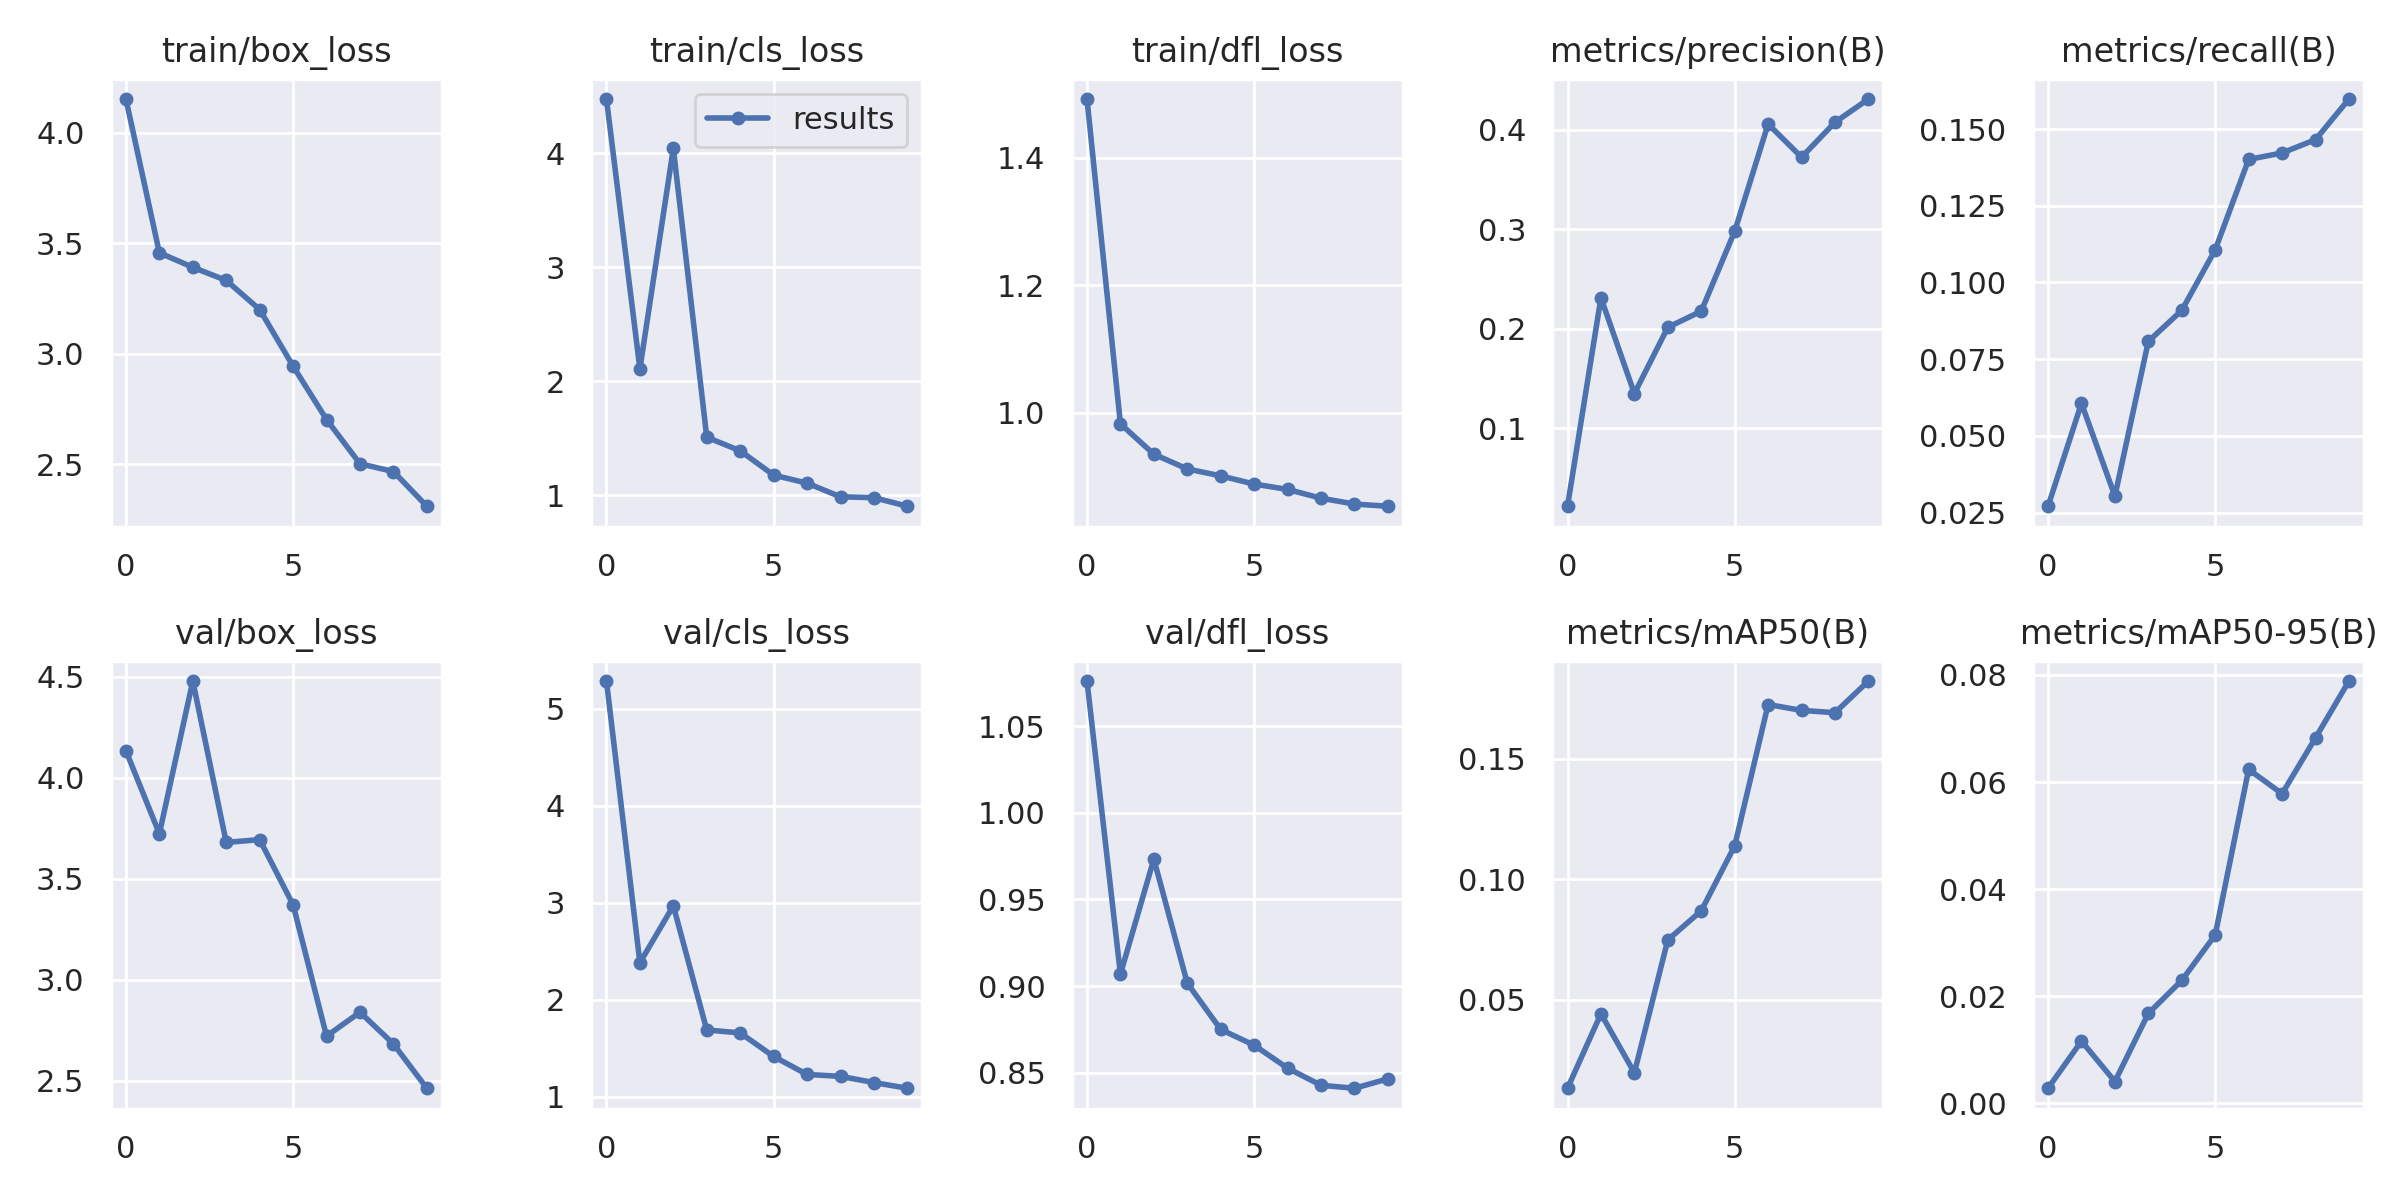

In [11]:
Image(filename='/content/datasets/runs/detect/train3/results.png', width=600)

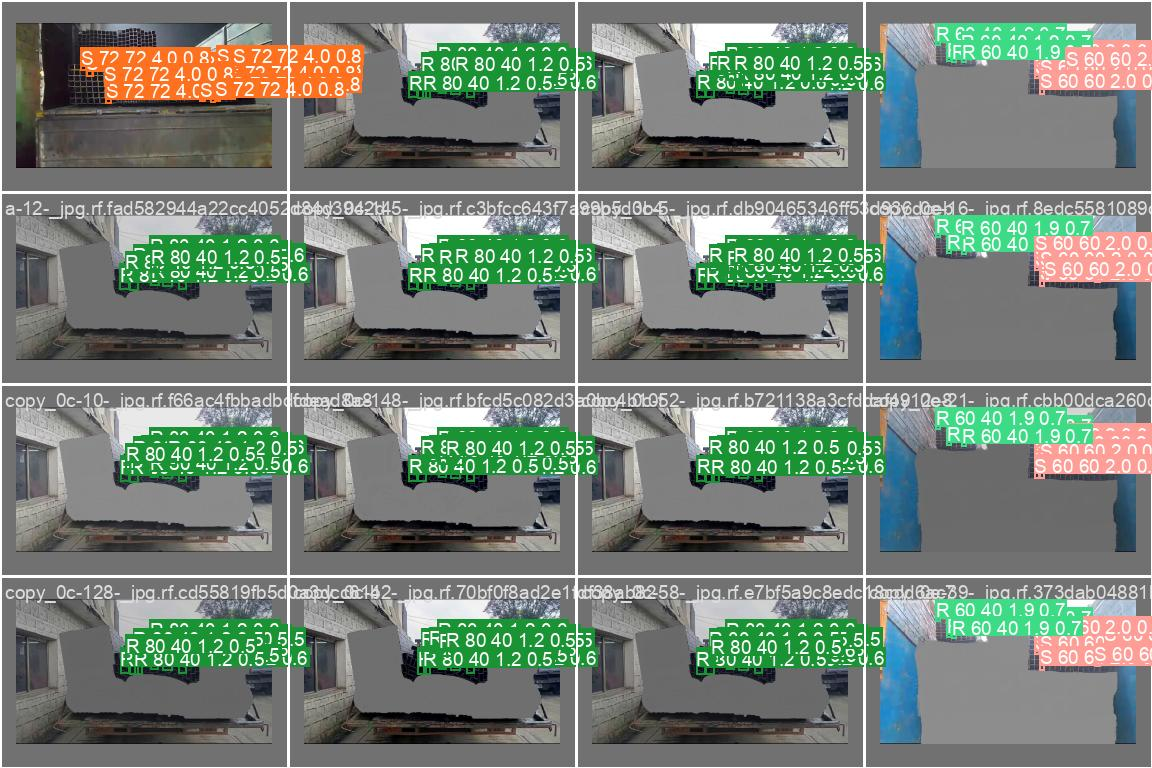

In [12]:
Image(filename='/content/datasets/runs/detect/train3/val_batch0_pred.jpg', width=600)

In [13]:
!yolo task=detect mode=val model=/content/datasets/runs/detect/train3/weights/best.pt data=/content/datasets/pipe-inventory-4/data.yaml

2023-10-31 12:43:40.353194: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 12:43:40.353277: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 12:43:40.353315: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-31 12:43:40.360608: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-31 12:43:42.296682: W tensorflow/c

In [14]:
!yolo predict mode=predict model=/content/datasets/runs/detect/train3/weights/best.pt conf=0.25 source=/content/datasets/pipe-inventory-4/test/images save=True

2023-10-31 12:46:51.767256: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 12:46:51.767334: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 12:46:51.767374: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-31 12:46:51.778521: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-31 12:46:53.429018: W tensorflow/c

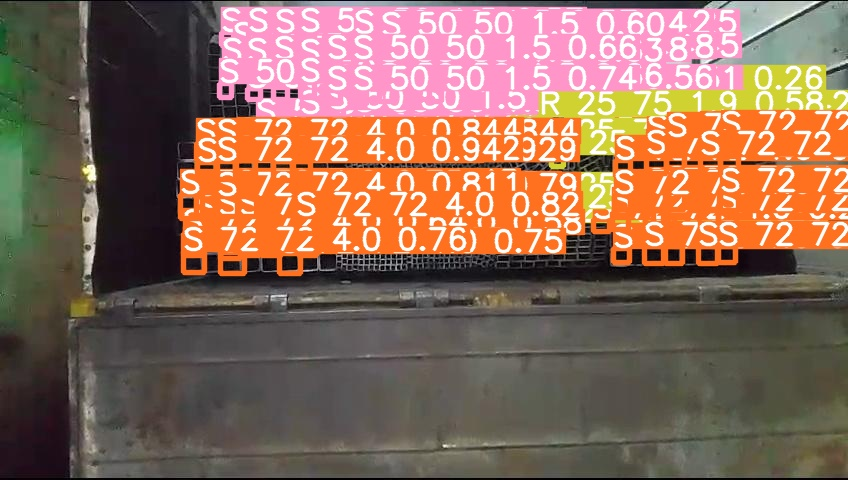

In [17]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/datasets/runs/detect/predict/a-17-_jpg.rf.9adb9768b01e3d97a9d19457a96872d4.jpg')[:3]:
      display(Image(filename=image_path, width=600))
print("\n")